# Big Data Mart Sales Problem

Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

In [1]:
#pip install -U pandasql

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/sandespalakat/Datascience/main/Big-Data-Mart/Data/bigdatamart_Train.csv")

In [4]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
data = pd.DataFrame(data)

In [6]:
len(data.Item_Identifier.unique())

1559

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#here we are considering 1559 different products

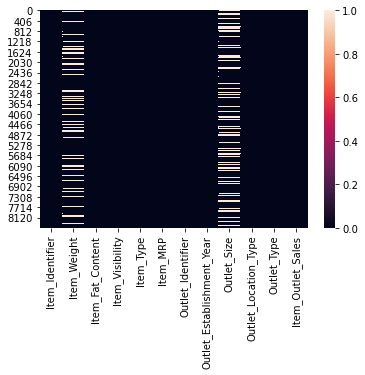

In [9]:
sns.heatmap(data.isnull())

In [10]:
#There are null values in Item weight and Outlet size columns

In [11]:
data.Item_Weight.replace(np.nan,data.Item_Weight.median(), inplace=True)

In [12]:
a = data.Outlet_Size.mode()
a

0    Medium
dtype: object

In [13]:
data["Outlet_Size"] = data["Outlet_Size"].fillna("Medium")

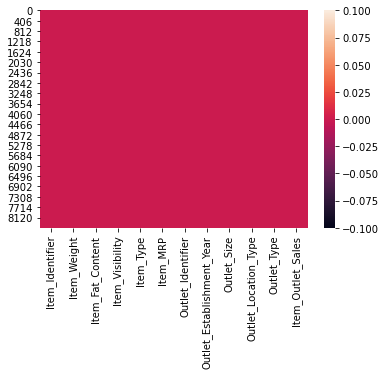

In [14]:
sns.heatmap(data.isnull())

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


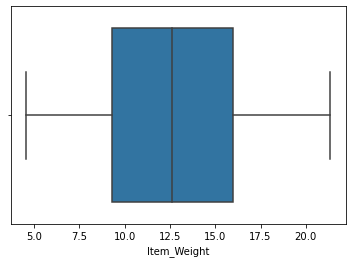

In [15]:
sns.boxplot(data.Item_Weight, orient="v")

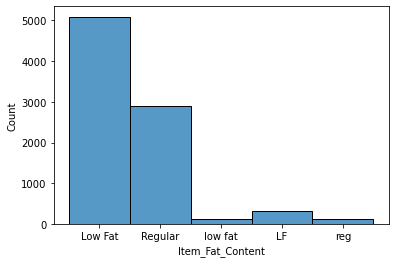

In [16]:
sns.histplot(data.Item_Fat_Content)

In [17]:
#There are 5 levels of fat is distributed in 1559 products. The most purchased fat level is "low"

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


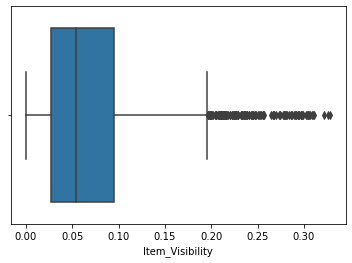

In [18]:
sns.boxplot(data.Item_Visibility)

In [19]:
#There is a large aount of ouliers in Item visibility column

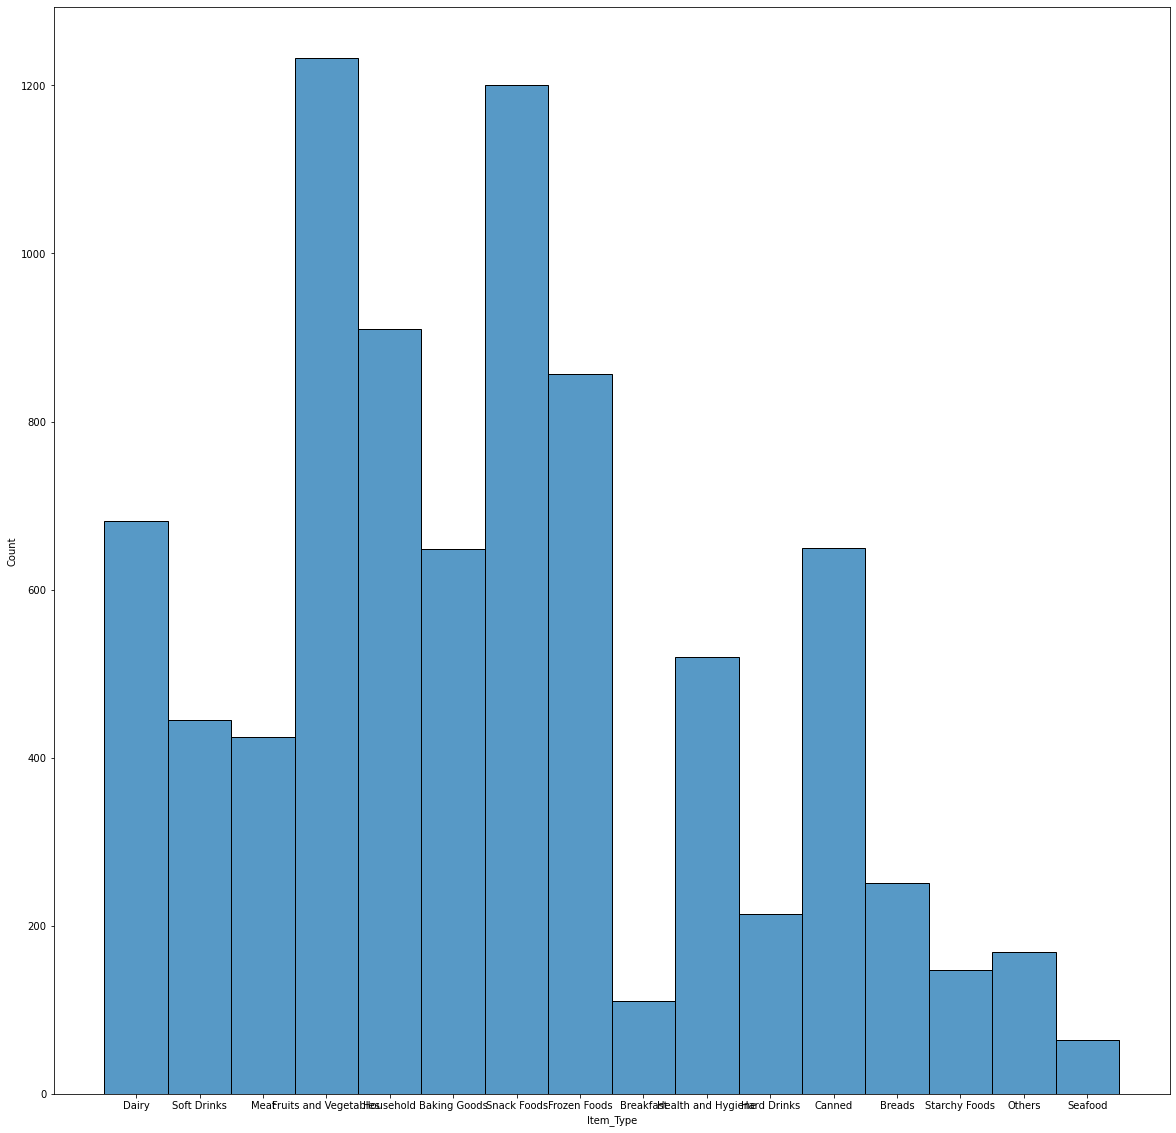

In [20]:
plt.figure(figsize=(20,20))
sns.histplot(data.Item_Type)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


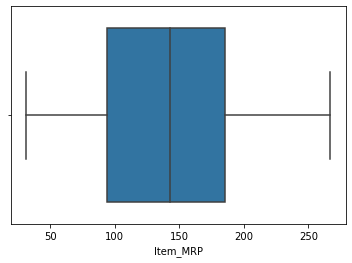

In [21]:
sns.boxplot(data.Item_MRP)

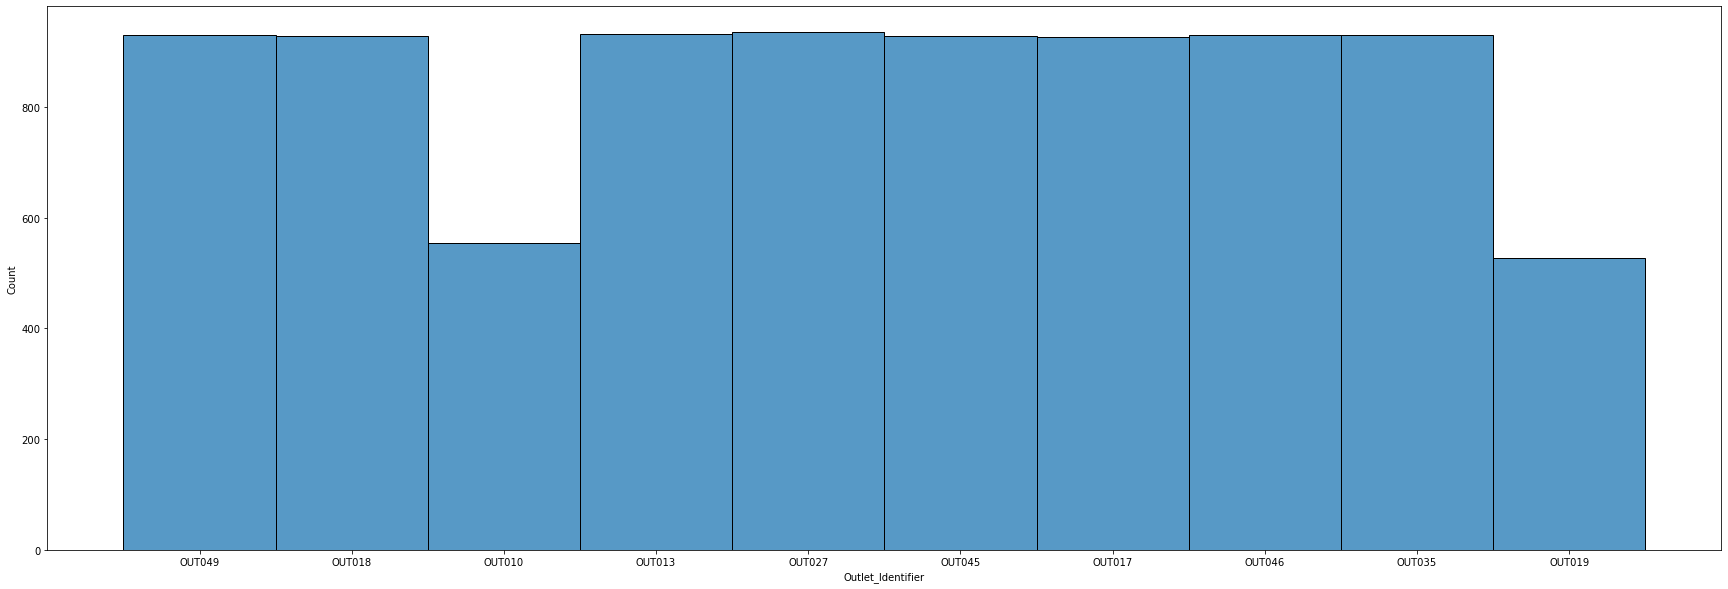

In [22]:
plt.figure(figsize=(30,10))
sns.histplot(data.Outlet_Identifier)

In [23]:
#out of 10 sales points, OUT010 and OUT019 have less sales when comparing with others

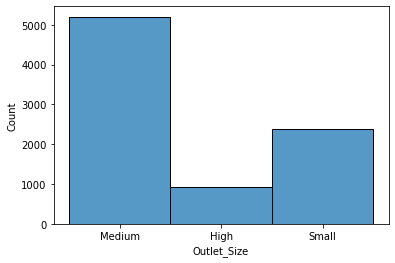

In [24]:
sns.histplot(data.Outlet_Size)

In [25]:
#Most of the shop sxies are Medium

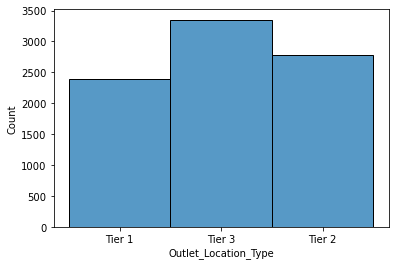

In [26]:
sns.histplot(data.Outlet_Location_Type)

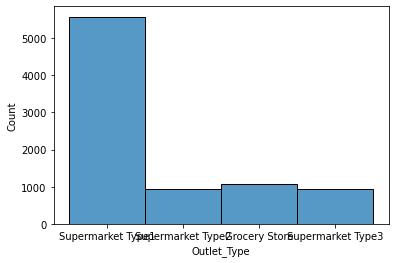

In [27]:
sns.histplot(data.Outlet_Type)

In [28]:
#Most of the shops are Supermarkets

In [29]:
datag = ps.sqldf("SELECT Item_Identifier, Item_Outlet_sales FROM data GROUP BY Item_Identifier")

In [30]:
datag

,Item_Identifier,Item_Outlet_Sales
0,DRA12,2552.6772
1,DRA24,1146.5076
2,DRA59,4442.2176
3,DRB01,1518.0240
4,DRB13,3415.5540
...,...,...
1554,NCZ30,241.0196
1555,NCZ41,876.1928
1556,NCZ42,711.0744
1557,NCZ53,1884.2140


D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


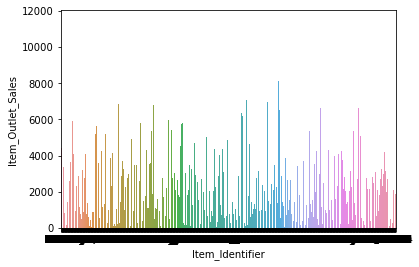

In [31]:
sns.barplot(datag.Item_Identifier, datag.Item_Outlet_Sales)

In [32]:
data_f = ps.sqldf("SELECT Item_Fat_Content, sum(Item_Outlet_sales) as sales FROM data GROUP BY Item_Fat_Content")

In [33]:
data_f

,Item_Fat_Content,sales
0,LF,6.552424e+05
1,Low Fat,1.101503e+07
2,Regular,6.457454e+06
3,low fat,2.338270e+05
4,reg,2.295765e+05


D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


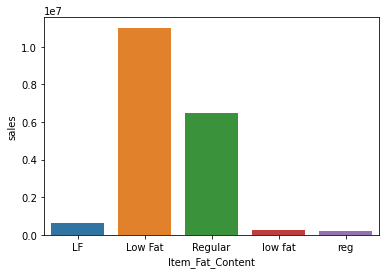

In [34]:
sns.barplot(data_f["Item_Fat_Content"], data_f["sales"])

In [35]:
data_o = ps.sqldf("SELECT Outlet_Size, sum(Item_Outlet_sales) as sales FROM data GROUP BY Outlet_Size")

In [36]:
data_o

,Outlet_Size,sales
0,High,2.142664e+06
1,Medium,1.188225e+07
2,Small,4.566212e+06


D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


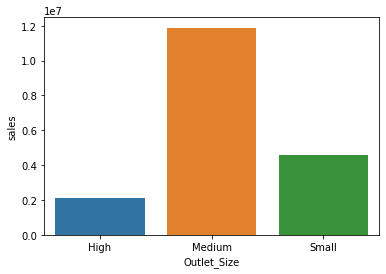

In [37]:
sns.barplot(data_o["Outlet_Size"], data_o["sales"])

In [38]:
data_t = ps.sqldf("SELECT Outlet_Location_Type,sum(Item_Outlet_sales) as sales FROM data GROUP BY Outlet_Location_Type")

In [39]:
data_t

,Outlet_Location_Type,sales
0,Tier 1,4.482059e+06
1,Tier 2,6.472314e+06
2,Tier 3,7.636753e+06


D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


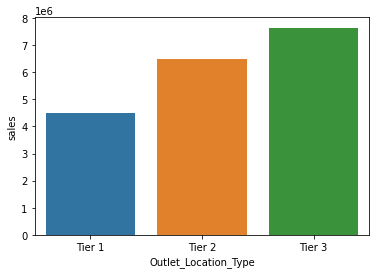

In [40]:
sns.barplot(data_t["Outlet_Location_Type"], data_t["sales"])

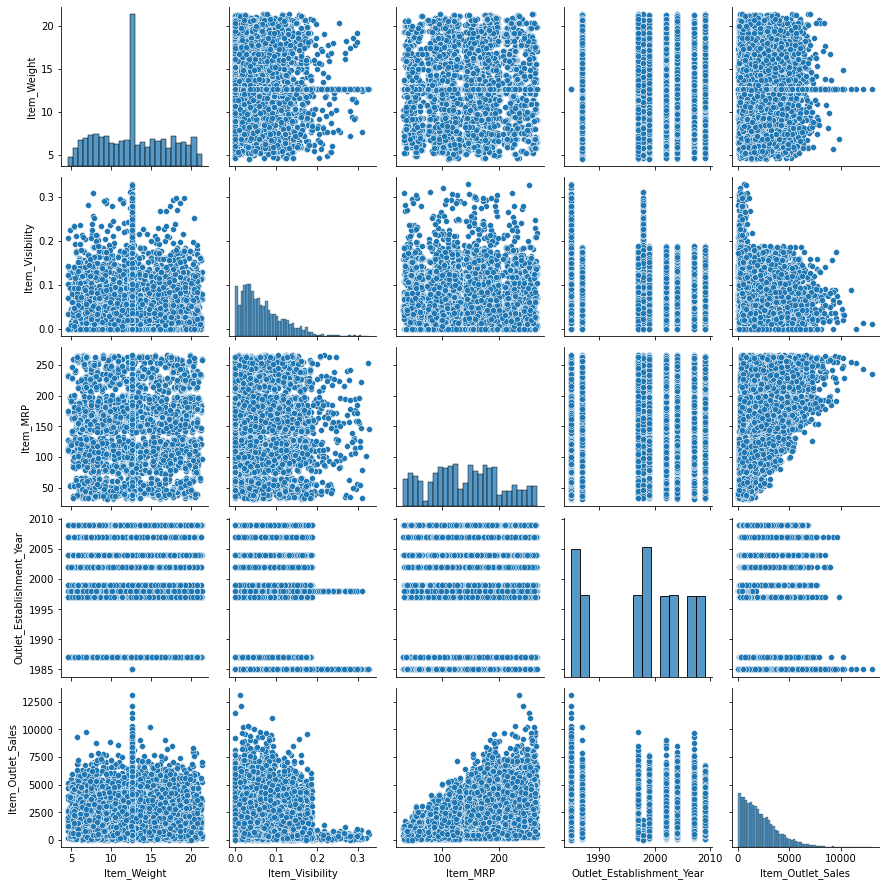

In [41]:
sns.pairplot(data)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


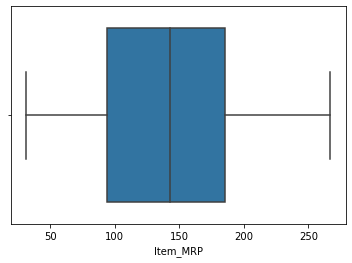

In [42]:
sns.boxplot(data.Item_MRP)

In [43]:
data.skew()

Item_Weight                  0.121845
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [44]:
#We can see that There is skewness and outliers in item visibiity

In [45]:
#removing outliers
from scipy.stats import zscore

In [46]:
z_score = np.abs(zscore(data.Item_Visibility))

In [47]:
z_score.shape

(8523,)

In [48]:
print((np.where(z_score > 3)))

(array([  49,   83,  108,  174,  434,  502,  521,  532,  854, 1159, 1272,
       1291, 1311, 1324, 1434, 1496, 1501, 1560, 1575, 1644, 1651, 1805,
       1827, 1841, 2088, 2122, 2251, 2324, 2439, 2445, 2586, 2613, 2728,
       2855, 2895, 3017, 3206, 3399, 3458, 3474, 3488, 3497, 3540, 3750,
       3767, 3884, 3993, 4006, 4219, 4382, 4408, 4530, 4656, 4674, 4789,
       4941, 5031, 5150, 5287, 5374, 5732, 5734, 5795, 5837, 5880, 5891,
       5946, 6008, 6012, 6179, 6536, 6576, 6622, 6674, 6786, 6903, 7005,
       7088, 7107, 7121, 7215, 7250, 7278, 7388, 7499, 7558, 7603, 7744,
       7866, 7949, 8194, 8215, 8273, 8345, 8432], dtype=int64),)


In [49]:
zs = np.where(z_score > 3)              
for z in zs[0]:
    data.drop(index=z, axis=0, inplace=True)

In [50]:
data.shape

(8428, 12)

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
columns = ["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

In [53]:
le = LabelEncoder()
for i in columns:
    data[i] = le.fit_transform(data[i])

In [54]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [55]:
x = data.iloc[:, :-1]

In [56]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [57]:
y = data.iloc[:,-1]

In [58]:
y 

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8428, dtype: float64

In [59]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2 > max_acc:
        max_acc = r2
        max_rs = i
print("Best random state=",max_rs)

Best random state= 115


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [62]:
models = {"SVR":SVR(),"KNN":KNeighborsRegressor(), "RandomForest":RandomForestRegressor(),"LinearRegression":LinearRegression(), "Ridge":Ridge(), "dtr":DecisionTreeRegressor() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    #mod = DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    r2_sc = r2_score(y_test,pred)
    acc[i] = r2_sc
    mod_list.append(mod)
print(acc)

{'SVR': -0.04132134972642221, 'KNN': 0.20180173317226957, 'RandomForest': 0.5608882694306383, 'LinearRegression': 0.5086336102175165, 'Ridge': 0.508751444098908, 'dtr': 0.16497440748897674}


In [63]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [64]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVR()': -0.04681148717797428, 'KNeighborsRegressor()': 0.19980847260516352, 'RandomForestRegressor()': 0.5463928880772866, 'LinearRegression()': 0.5052473486372191, 'Ridge()': 0.5052515601491911, 'DecisionTreeRegressor()': 0.15782182890254878}


In [65]:
#Linear regression is the best performing algrothm

In [66]:
from sklearn.model_selection import  GridSearchCV

In [68]:
param_grid = {"fit_intercept":[True, False] ,
              "normalize":[True, False] ,
              "copy_X":[True, False] ,
              'n_jobs': [1, 2, 3, 4, 5]}

In [69]:
    lr = LinearRegression()

g_search = GridSearchCV(estimator = lr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(x_train, y_train);

print(g_search.best_params_)

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'normalize': True}


In [70]:
gc_pred = g_search.best_estimator_.predict(x_test)

In [71]:
r2_score(y_test, gc_pred)

0.5086500565431222

In [72]:
import joblib

In [73]:
joblib.dump(g_search.best_estimator_, "MartModel.obj")

['MartModel.obj']

#### TESTING

In [74]:
test = pd.read_csv("https://raw.githubusercontent.com/sandespalakat/Datascience/main/Big-Data-Mart/Data/bigdatamart_Test.csv")

In [75]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [76]:
test = pd.DataFrame(test)

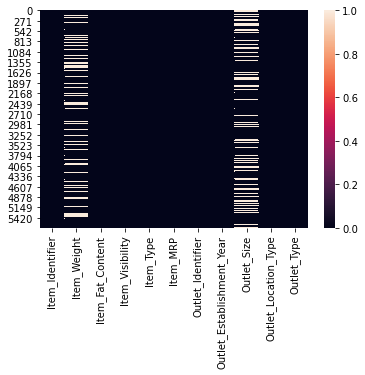

In [77]:
sns.heatmap(test.isnull())

In [78]:
test.Item_Weight.replace(np.nan,test.Item_Weight.median(), inplace=True)

In [80]:
a = test.Outlet_Size.mode()
a

0    Medium
dtype: object

In [81]:
test["Outlet_Size"] = test["Outlet_Size"].fillna("Medium")

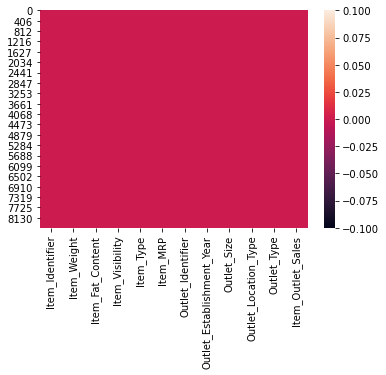

In [82]:
sns.heatmap(data.isnull())

In [83]:
#removing outliers
from scipy.stats import zscore

In [84]:
z_score = np.abs(zscore(test.Item_Visibility))

In [85]:
zs = np.where(z_score > 3)              
for z in zs[0]:
    test.drop(index=z, axis=0, inplace=True)

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
columns = ["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

In [88]:
le = LabelEncoder()
for i in columns:
    test[i] = le.fit_transform(test[i])

In [89]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1102,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,1066,8.300,4,0.038428,4,87.3198,2,2007,1,1,1
2,1405,14.600,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315,1,0.015388,13,155.0340,2,2007,1,1,1
4,1183,12.500,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1411,10.000,1,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300,2,0.000000,3,214.6218,2,2007,1,1,1


In [90]:
#load model

In [92]:
filename = "MartModel.obj"
with open(filename, 'rb') as file:  
    model = joblib.load(file)

In [94]:
model

LinearRegression(fit_intercept=False, n_jobs=1, normalize=True)

In [95]:
predicted_sales = model.predict(test)

array([2120.97467222, 1228.63003135, 2257.9701705 , ..., 1865.448338  ,
       3218.94160139, 1245.95260113])